Methods used-

1. Mean for missing data.
2. Equal Width discretization for continuous variables.
3. IQR for outlier.
4. Ordinal method for categorical encoding.
5. Standardscaler for feature scaling.


All methods and all different models are used in pipeline with column transformer at the down side of notebook, after the graphs and behavior of features with the respective preprocessing methods.

Conclusion-

1. Decision trees slightly predicts good number of true negatives as compared to random forest but more false positives as well.
2. Naive bayes works slightly better with true positives but an increase in false positives.
3. KNN, Logistic regression and SVM does not predicts true positives at all.
4. Decision trees and random forest works slightly better without outlier handling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv('Disease Prediction Data.csv')
dataset1=dataset1.drop('id',axis=1)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  apoplexy           5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [3]:
print(dataset1.shape)
dataset1.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [4]:
dataset1.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
apoplexy             0.000000
dtype: float64

In [5]:
vars_with_na=[var for var in dataset1.columns if dataset1[var].isnull().mean()>0]
vars_with_na

['bmi']

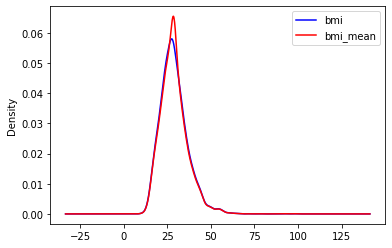

In [6]:
bmi_check=pd.DataFrame()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

bmi_check['bmi']=dataset1['bmi']
bmi_check['bmi_mean']=imputer.fit_transform(dataset1[['bmi']])

fig_median=plt.figure()
ax1=fig_median.add_subplot(111)

bmi_check['bmi'].plot(kind='kde', ax=ax1, color='blue')
bmi_check['bmi_mean'].plot(kind='kde', ax=ax1, color='red')


lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='best')

In [7]:
imputer = SimpleImputer(strategy='mean')
dataset1['bmi']=imputer.fit_transform(dataset1[['bmi']])

In [8]:
dataset1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

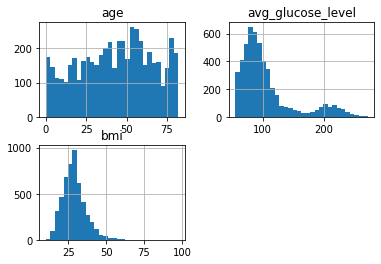

In [9]:
dataset1[['age','avg_glucose_level','bmi']].hist(bins=30)

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

In [11]:
disc = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
disc.fit(dataset1[['age','avg_glucose_level','bmi']])
disc.bin_edges_

array([array([8.000e-02, 1.032e+01, 2.056e+01, 3.080e+01, 4.104e+01, 5.128e+01,
              6.152e+01, 7.176e+01, 8.200e+01])                                ,
       array([ 55.12  ,  82.1975, 109.275 , 136.3525, 163.43  , 190.5075,
              217.585 , 244.6625, 271.74  ])                             ,
       array([10.3   , 21.2125, 32.125 , 43.0375, 53.95  , 64.8625, 75.775 ,
              86.6875, 97.6   ])                                            ],
      dtype=object)

In [12]:
dataset1[['age','avg_glucose_level','bmi']]=disc.transform(dataset1[['age','avg_glucose_level','bmi']])

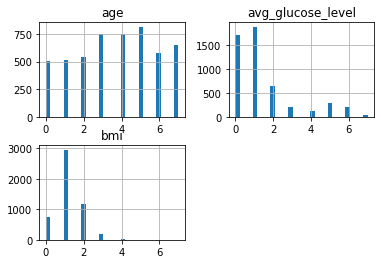

In [13]:
dataset1[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

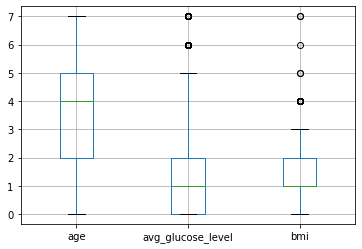

In [14]:
dataset1[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [15]:
def outlier_handling():
    variable=['age','avg_glucose_level','bmi']
    for i in variable:
        def find_skewed_boundries(df,variable,distance):
            IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
            lower_boundry=df[variable].quantile(0.25)-(IQR*distance)
            upper_boundry=df[variable].quantile(0.75)+(IQR*distance)  
            return upper_boundry,lower_boundry
        
        variable_upperlimit,variable_lowerlimit=find_skewed_boundries(dataset1,i,1.5)
        
        dataset1[i]=np.where(dataset1[i]>variable_upperlimit,variable_upperlimit,
                        np.where(dataset1[i]<variable_lowerlimit,variable_lowerlimit,dataset1[i]))

In [16]:
outlier_handling()

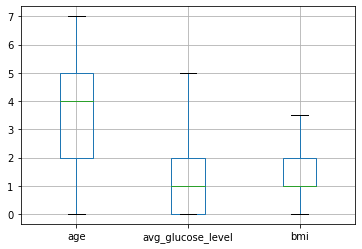

In [17]:
dataset1[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [18]:
x=dataset1.iloc[:,:-1].values
y=dataset1.iloc[:,-1].values

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[:,[0,2,3,4,5,6,9]]=oe.fit_transform(x[:,[0,2,3,4,5,6,9]])

In [21]:
print(pd.DataFrame(x))

        0    1    2    3    4    5    6    7    8    9
0     1.0  6.0  0.0  1.0  1.0  2.0  1.0  5.0  2.0  1.0
1     0.0  5.0  0.0  0.0  1.0  3.0  0.0  5.0  1.0  2.0
2     1.0  7.0  0.0  1.0  1.0  2.0  0.0  1.0  2.0  2.0
3     0.0  4.0  0.0  0.0  1.0  2.0  1.0  4.0  2.0  3.0
4     0.0  7.0  1.0  0.0  1.0  3.0  0.0  4.0  1.0  2.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
5105  0.0  7.0  1.0  0.0  1.0  2.0  1.0  1.0  1.0  2.0
5106  0.0  7.0  0.0  0.0  1.0  3.0  1.0  2.0  2.0  2.0
5107  0.0  3.0  0.0  0.0  1.0  3.0  0.0  1.0  1.0  2.0
5108  1.0  4.0  0.0  0.0  1.0  2.0  0.0  4.0  1.0  1.0
5109  0.0  4.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0

[5110 rows x 10 columns]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

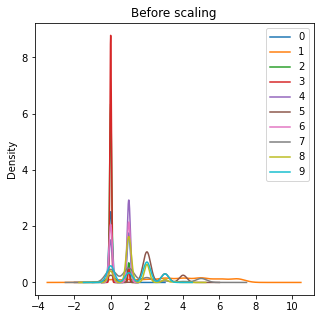

In [23]:
fig,ax5=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train).plot(kind='kde', ax=ax5)
ax5.set_title('Before scaling')
lines5, labels5 = ax5.get_legend_handles_labels()
ax5.legend(lines5, labels5, loc='best')

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

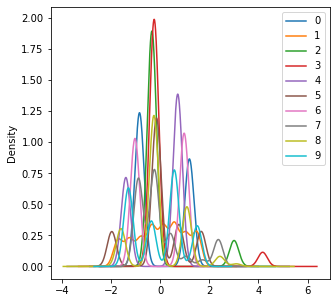

In [25]:
fig,ax6=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train).plot(kind='kde', ax=ax6)
ax5.set_title('After scaling')
lines6, labels6 = ax6.get_legend_handles_labels()
ax6.legend(lines6, labels6, loc='best')

In [ ]:
#Pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('Disease Prediction Data.csv')
dataset=dataset.drop('id',axis=1)
print(dataset.shape)
dataset.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [3]:
def outlier_handling():
    variable=['age','avg_glucose_level','bmi']
    for i in variable:
        def find_skewed_boundries(df,variable,distance):
            IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
            lower_boundry=df[variable].quantile(0.25)-(IQR*distance)
            upper_boundry=df[variable].quantile(0.75)+(IQR*distance)  
            return upper_boundry,lower_boundry
        
        variable_upperlimit,variable_lowerlimit=find_skewed_boundries(dataset,i,1.5)
        
        dataset[i]=np.where(dataset[i]>variable_upperlimit,variable_upperlimit,
                        np.where(dataset[i]<variable_lowerlimit,variable_lowerlimit,dataset[i]))

In [4]:
numeric_features=["age","avg_glucose_level","bmi"]
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('binning',KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')),
                                   ('outlier',outlier_handling()),('scaler',StandardScaler())])

categorical_features=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
categorical_transformer=Pipeline(steps=[('encoder',OrdinalEncoder()),('scaler',StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])


In [5]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

le=LabelEncoder()
y=le.fit_transform(y)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Descision Tree

[[930  38]
 [ 48   6]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.14      0.11      0.12        54

    accuracy                           0.92      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



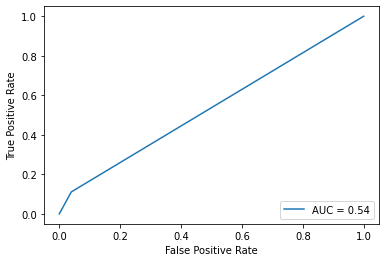

---------------------------------------------------------------------------------------------------------------------


KNN

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



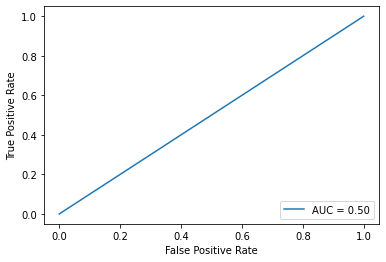

---------------------------------------------------------------------------------------------------------------------


Logistic regression

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



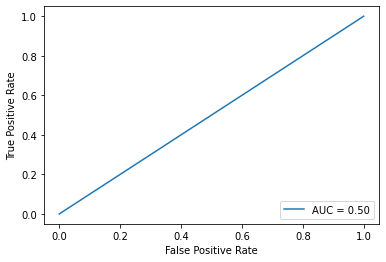

---------------------------------------------------------------------------------------------------------------------


Naive Bayes

[[883  85]
 [ 35  19]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       968
           1       0.18      0.35      0.24        54

    accuracy                           0.88      1022
   macro avg       0.57      0.63      0.59      1022
weighted avg       0.92      0.88      0.90      1022



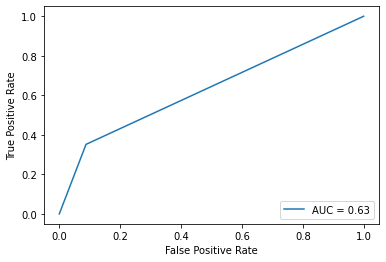

---------------------------------------------------------------------------------------------------------------------


Random Forest

[[964   4]
 [ 52   2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.64      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



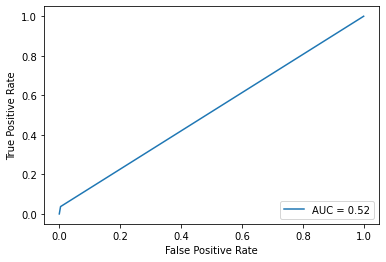

---------------------------------------------------------------------------------------------------------------------


SVM

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



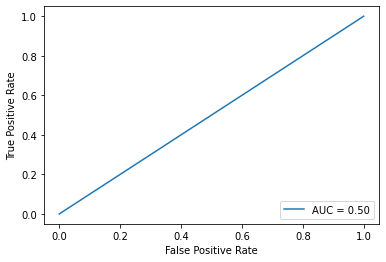

---------------------------------------------------------------------------------------------------------------------




In [7]:
for i in range(6):
    models=[DecisionTreeClassifier(criterion='entropy', random_state=0),KNeighborsClassifier(n_neighbors=9,metric='minkowski'),LogisticRegression(random_state=0),GaussianNB(),RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=3),SVC(kernel='rbf', random_state=0,C= 0.25, gamma=0.1)]
    name=['Descision Tree','KNN','Logistic regression','Naive Bayes','Random Forest','SVM']
    classification_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classification',models[i])])
    classification_pipeline.fit(x_train,y_train)
    y_pred=classification_pipeline.predict(x_test)
    cm=confusion_matrix(y_test, y_pred)
    print(name[i])
    print()
    print(cm)
    print(classification_report(y_true=y_test,y_pred=y_pred,zero_division=0))
    from sklearn import metrics
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr,tpr)
    display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
    display.plot()
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')            
    print()
    print() 